In [76]:
import sys 
from scipy.interpolate import RegularGridInterpolator
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sys.path.append("/users/tom/git/neon_blink_detection/")
sys.path.append("/users/tom/git/neon_blink_detection/src")
sns.set(rc={'axes.facecolor':[0.95, 0.95, 0.95]})

from src.features_calculator import (
    new_concatenate_features,
    get_augmentation_pars,
    create_interpolater
)
from training.helper import get_augmentation_options

import numpy as np
from training.video_loader import video_loader
from src.helper import OfParams, AugParams

of_params = OfParams()
aug_params = AugParams()

clip_name = "1322-2023-02-03-14-25-41-7883a14f"

of_params = OfParams(n_layers=5, layer_interval=7, average=False, img_shape=(64, 64), grid_size=7, step_size=7, window_size=15, stop_steps=3)

rec = video_loader(of_params, aug_params)

rec._of_params.grid_size = 7
rec._of_params.n_layers = 5

feature_array, all_timestamps, clip_transitions = rec._load_features(
            clip_name, rec._of_params)

n_clips = clip_transitions.shape[0] + 1
clip_feature_array = np.split(feature_array, clip_transitions + 1, axis=0)
clip_timestamps = np.split(all_timestamps, clip_transitions + 1, axis=0)

Number of clips: 2


In [38]:
7*7, 7*7, 7*7, 7*7, 7*7

245

options 1
0.5005
12.511505


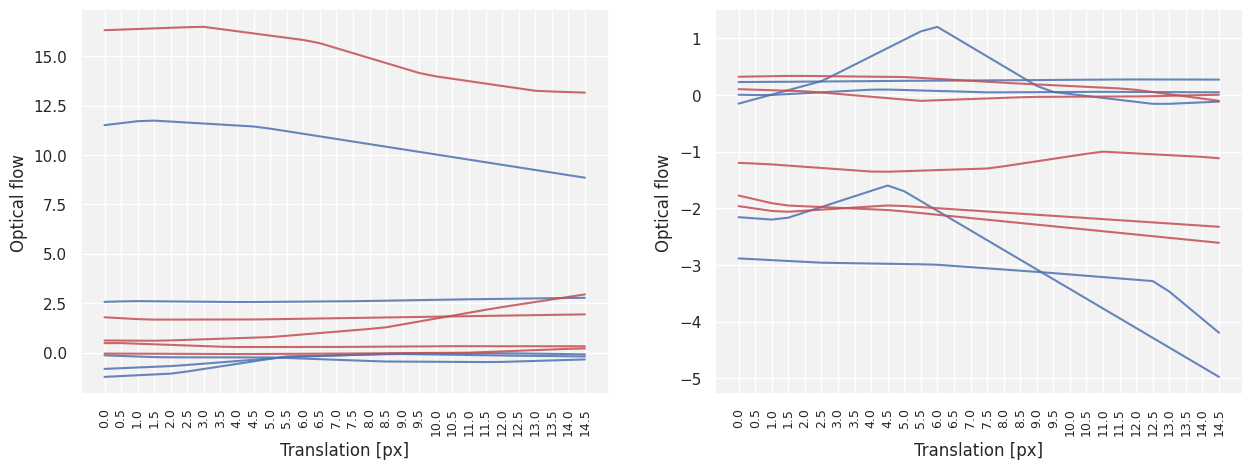

In [93]:

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

iclip = 1


all_times = (clip_timestamps[iclip] - clip_timestamps[iclip][0]) / 1e9 
indc_times = [all_times[100], all_times[2500]]

aug_params_options = get_augmentation_options()
aug_options = aug_params_options[0]
aug_params = get_augmentation_pars(aug_options)

interp_left, interp_right = create_interpolater(clip_feature_array[iclip][:, :, 1], all_times)
n_clip_frames = clip_feature_array[iclip].shape[0]

trans_params = list(np.arange(0, 15, 0.5))

for ii, times in enumerate(indc_times):

    print(times)

    vec = np.zeros([490, len(trans_params)])

    aug_params = {}

    aug_params["speed"] = 1
    aug_params["translation"] = np.zeros((1, 2))
    aug_params["scale"] = 1
    aug_params["linear_distort"] = np.eye(2)

    aug_feat = new_concatenate_features(
        interp_left,
        interp_right,
        n_clip_frames,
        of_params,
        times,
        aug_params,
    )

    vec[:, 0] = aug_feat

    for i, trans in enumerate(trans_params):

        aug_params["speed"] = 1
        aug_params["translation"] = [0, trans]
        aug_params["scale"] = 1 
        aug_params["linear_distort"] = np.eye(2) + [[0, 0], [0, 0]]

        aug_feat = new_concatenate_features(
            interp_left,
            interp_right,
            n_clip_frames,
            of_params,
            times,
            aug_params,
        )
        
        vec[:, i] = aug_feat

    indc = list(np.random.randint(0, 245, [5, ]))
    ax[ii].plot(vec[indc, :].transpose(), c="b", alpha=0.85)
    indc = list(np.random.randint(245, 490, [5, ]))
    ax[ii].plot(vec[indc, :].transpose(), c="r", alpha=0.85)
    ax[ii].set_ylabel("Optical flow")
    ax[ii].set_xlabel("Translation [px]")
    ax[ii].set_xticks(range(len(trans_params)), [f"{x:.1f}" for x in trans_params], rotation=90, fontsize=9)



**Plot feature vector as function of augmentation**

options 1
0.5005
12.511505


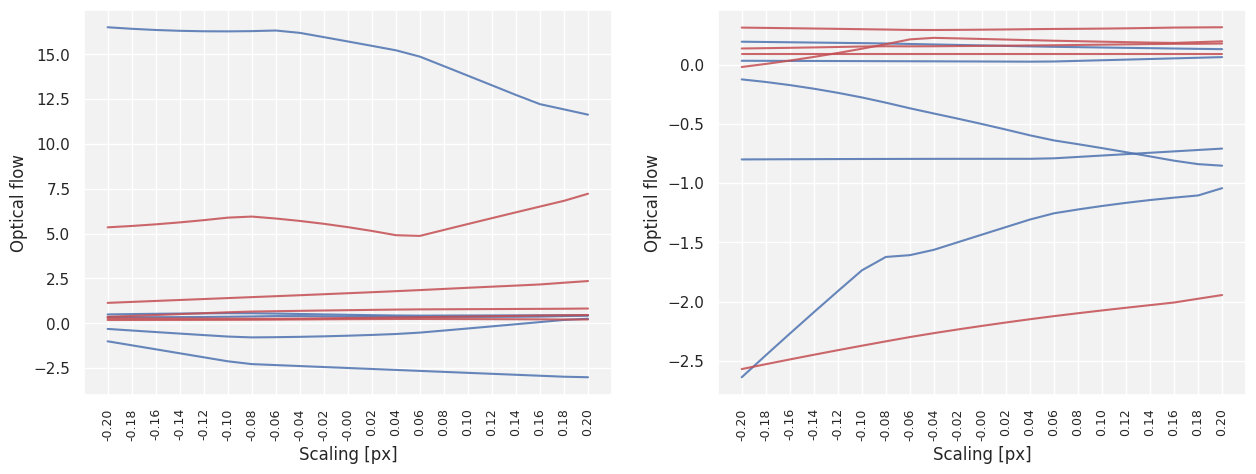

In [91]:

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)


iclip = 1


all_times = (clip_timestamps[iclip] - clip_timestamps[iclip][0]) / 1e9 
indc_times = [all_times[100], all_times[2500]]

aug_params_options = get_augmentation_options()
aug_options = aug_params_options[0]
aug_params = get_augmentation_pars(aug_options)

interp_left, interp_right = create_interpolater(clip_feature_array[iclip][:, :, 1], all_times)
n_clip_frames = clip_feature_array[iclip].shape[0]

trans_params = list(np.arange(-0.2, 0.22, 0.02))

for ii, times in enumerate(indc_times):

    print(times)

    vec = np.zeros([490, len(trans_params)])

    aug_params = {}

    aug_params["speed"] = 1
    aug_params["translation"] = np.zeros((1, 2))
    aug_params["scale"] = 1
    aug_params["linear_distort"] = np.eye(2)

    aug_feat = new_concatenate_features(
        interp_left,
        interp_right,
        n_clip_frames,
        of_params,
        times,
        aug_params,
    )

    vec[:, 0] = aug_feat

    for i, trans in enumerate(trans_params):

        aug_params["speed"] = 1
        aug_params["translation"] = [0, 0]
        aug_params["scale"] = 1 + trans
        aug_params["linear_distort"] = np.eye(2) + [[0, 0], [0, 0]]

        aug_feat = new_concatenate_features(
            interp_left,
            interp_right,
            n_clip_frames,
            of_params,
            times,
            aug_params,
        )
        
        vec[:, i] = aug_feat

    indc = list(np.random.randint(0, 245, [5, ]))
    ax[ii].plot(vec[indc, :].transpose(), c="b", alpha=0.85)
    indc = list(np.random.randint(245, 490, [5, ]))
    ax[ii].plot(vec[indc, :].transpose(), c="r", alpha=0.85)
    ax[ii].set_ylabel("Optical flow")
    ax[ii].set_xlabel("Scaling [px]")
    ax[ii].set_xticks(range(len(trans_params)), [f"{x:.2f}" for x in trans_params], rotation=90, fontsize=9)



In [87]:
len(list(np.arange(0, 5, 0.5))) * len(list(np.arange(0, 0.2, 0.02)))

100

array([181, 157,   0, 220, 132])